In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")

# 1.1 Movielens full - EDA

# A

In [3]:
# EDA
df_movies.info(), df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


(None, None)

In [4]:
df_movies.describe()

,movieId
count,58098.000000
mean,111919.516197
std,59862.660956
min,1.000000
25%,72437.750000
50%,126549.000000
75%,161449.500000
max,193886.000000


In [5]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


In [6]:
df_ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [7]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [10]:
# Do some EDA

# Merge the two dataframes

df = pd.merge(df_movies, df_ratings, on='movieId')

df[df['title'] == "Jumanji (1995)"]

,movieId,title,genres,userId,rating,timestamp
68469,2,Jumanji (1995),Adventure|Children|Fantasy,4,4.0,1113767306
68470,2,Jumanji (1995),Adventure|Children|Fantasy,14,4.0,1522101105
68471,2,Jumanji (1995),Adventure|Children|Fantasy,39,3.5,1077333786
68472,2,Jumanji (1995),Adventure|Children|Fantasy,42,3.0,1251235519
68473,2,Jumanji (1995),Adventure|Children|Fantasy,45,0.5,1082139069
...,...,...,...,...,...,...
95607,2,Jumanji (1995),Adventure|Children|Fantasy,283156,3.0,847248972
95608,2,Jumanji (1995),Adventure|Children|Fantasy,283182,3.5,1479117712
95609,2,Jumanji (1995),Adventure|Children|Fantasy,283184,2.5,1150096924
95610,2,Jumanji (1995),Adventure|Children|Fantasy,283187,4.5,1397342254


<Axes: xlabel='rating'>

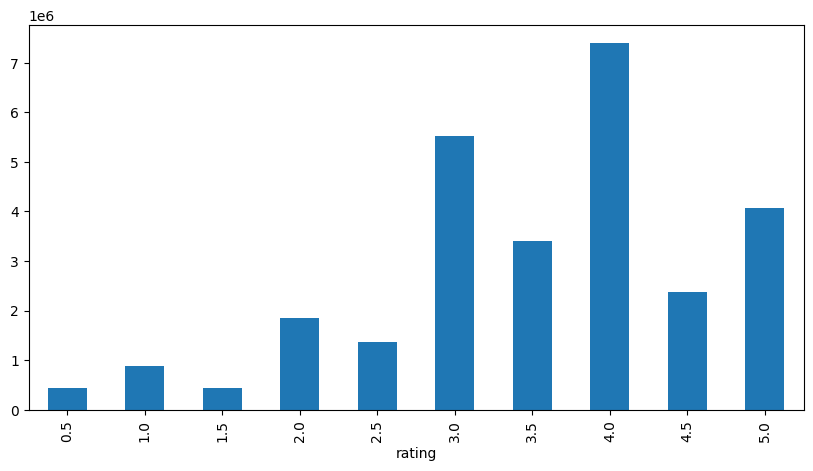

In [ ]:
df.groupby('rating')['userId'].count().plot(kind='bar', figsize=(10, 5))

Text(0.5, 1.0, 'Top 10 movies by number of ratings')

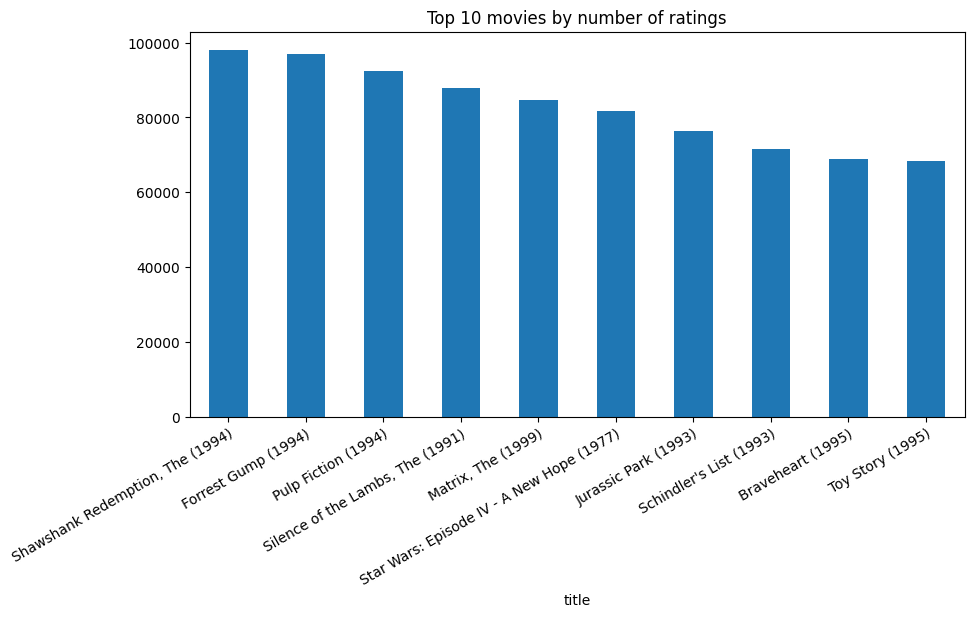

In [58]:
# sort movies by number of ratings

df.groupby('title')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30, rotation_mode="anchor", ha="right");
plt.title('Top 10 movies by number of ratings')